In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
df = pd.read_csv("updated_table_with_attributes.xlsx - Sheet1.csv")
df.head()

,OBJECTID_1,near_medical_facility,near_CMS_school,near_church,near_park,near_police,Street_Name,X_Coordinate,Y_Coordinate,Place1,Place2,NIBRS_Hi_Class,Year,X,Y,near_apartment
0,1,1,0,0,0,0,CENTRAL,1473959,536838,Residential,Apartment/Duplex Private Res,Aggravated Assault,2011,1473959,536838,0
1,2,0,0,1,0,0,ERSKINE,1465299,546013,Residential,Apartment/Duplex Private Res,Simple Assault,2011,1465299,546013,1
2,3,0,0,0,0,0,TRYON,1455688,547686,Public/Non-Residential,Other - Public/Non-Residential,Simple Assault,2011,1455688,547686,0
3,4,1,0,0,0,1,EASTWAY,1467856,537330,Commercial Place,Restaurant/Diner/Coffee Shop,Damage/Vandalism Of Property,2011,1467856,537330,1
4,5,0,1,1,1,1,MATHESON,1461207,547639,Residential,Private Residence,Damage/Vandalism Of Property,2011,1461207,547639,1


In [3]:
# Dropping the columns that are not intended for modeling
df = df.drop(columns=['Street_Name','OBJECTID_1','X_Coordinate','Y_Coordinate','X','Y'])
df.head()

,near_medical_facility,near_CMS_school,near_church,near_park,near_police,Place1,Place2,NIBRS_Hi_Class,Year,near_apartment
0,1,0,0,0,0,Residential,Apartment/Duplex Private Res,Aggravated Assault,2011,0
1,0,0,1,0,0,Residential,Apartment/Duplex Private Res,Simple Assault,2011,1
2,0,0,0,0,0,Public/Non-Residential,Other - Public/Non-Residential,Simple Assault,2011,0
3,1,0,0,0,1,Commercial Place,Restaurant/Diner/Coffee Shop,Damage/Vandalism Of Property,2011,1
4,0,1,1,1,1,Residential,Private Residence,Damage/Vandalism Of Property,2011,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36039 entries, 0 to 36038
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   near_medical_facility  36039 non-null  int64 
 1   near_CMS_school        36039 non-null  int64 
 2   near_church            36039 non-null  int64 
 3   near_park              36039 non-null  int64 
 4   near_police            36039 non-null  int64 
 5   Place1                 36039 non-null  object
 6   Place2                 36039 non-null  object
 7   NIBRS_Hi_Class         36039 non-null  object
 8   Year                   36039 non-null  int64 
 9   near_apartment         36039 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


# Baseline Model

In [5]:
# Creating a new baseline dataset which contains ONLY predictors from the original CMPD data
df_baseline = df.drop(columns=['near_medical_facility','near_CMS_school','near_church','near_park','near_police'])
df_baseline.head()

,Place1,Place2,NIBRS_Hi_Class,Year,near_apartment
0,Residential,Apartment/Duplex Private Res,Aggravated Assault,2011,0
1,Residential,Apartment/Duplex Private Res,Simple Assault,2011,1
2,Public/Non-Residential,Other - Public/Non-Residential,Simple Assault,2011,0
3,Commercial Place,Restaurant/Diner/Coffee Shop,Damage/Vandalism Of Property,2011,1
4,Residential,Private Residence,Damage/Vandalism Of Property,2011,1


In [6]:
df_baseline.shape

(36039, 5)

In [7]:
# Turning the categorical variables into dummy variables
df_baseline = pd.get_dummies(data=df_baseline, columns=['Place1','Place2','NIBRS_Hi_Class','Year'])
df_baseline.head()

,near_apartment,Place1_Commercial Place,Place1_Open Area,Place1_Public/Non-Residential,Place1_Residential,Place1_Retail,Place2_ABC/Liquor Store,Place2_ATM,Place2_Air/Bus/Train Terminal,Place2_Apartment/Duplex Private Res,...,NIBRS_Hi_Class_Vehicle Recovery,NIBRS_Hi_Class_Weapon Law Violations,NIBRS_Hi_Class_Wire Fraud,NIBRS_Hi_Class_Worthless Check: Felony (over $2000),Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# Creating our train/test split
baseline_train, baseline_test = train_test_split(df_baseline, test_size=0.25, random_state=14)

In [9]:
# Creating our train and test variables
x_train = baseline_train.drop(columns='near_apartment')
y_train = baseline_train['near_apartment']
x_test = baseline_test.drop(columns='near_apartment')
y_test = baseline_test['near_apartment']

In [10]:
# Function to find the best max_leaf_nodes for our tree
def find_best_max_leaf_nodes(x_train, y_train, x_test, y_test, max_leaf_nodes_list):
    best_accuracy = 0
    best_max_leaf_nodes = 0

    for max_leaf_nodes in max_leaf_nodes_list:
        # Build the Decision Tree Model
        model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
        model.fit(x_train, y_train)

        # Predict on the test set
        y_pred = model.predict(x_test)

        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Update best accuracy and best max_leaf_nodes
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_max_leaf_nodes = max_leaf_nodes

    return best_max_leaf_nodes

In [11]:
max_leaf_nodes_list = [5, 15, 25, 50, 75]

In [12]:
best_max_leaf_nodes = find_best_max_leaf_nodes(x_train, y_train, x_test, y_test, max_leaf_nodes_list)

In [13]:
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")

Best max_leaf_nodes: 75


In [14]:
# Creating and fitting the model
final_model = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes, random_state=14)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=75, random_state=14)

In [15]:
y_final_pred = final_model.predict(x_test)
final_accuracy = accuracy_score(y_test, y_final_pred)

In [16]:
# We can report an accuracy of about 62% for the baseline model
print(f"Accuracy of the Decision Tree Model with the best max_leaf_nodes: {final_accuracy}")

Accuracy of the Decision Tree Model with the best max_leaf_nodes: 0.6169811320754717


# Advanced Model

In [17]:
# For our Random Forest advanced model, we now make our X and Y based on the full dataset
X = df.drop(columns='near_apartment')
y = df['near_apartment']

# Converting categorical columns to dummy variables
X = pd.get_dummies(X)

In [18]:
# Creating our train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

In [19]:
rf_model = RandomForestClassifier(random_state=14)

# Testing different parameters
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV to reduce runtime
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=14)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_

# Build and execute our Random Forest Model with the best parameters
best_rf_model_random = RandomForestClassifier(random_state=14, **best_params_random)
best_rf_model_random.fit(X_train, y_train)

# Evaluate the accuracy of the Random Forest model on the test set
y_rf_pred_random = best_rf_model_random.predict(X_test)
rf_accuracy_random = accuracy_score(y_test, y_rf_pred_random)

# Print the best parameters and accuracy
print(f"Best Parameters for Random Forest Model (Randomized Search): {best_params_random}")
print(f"Accuracy of the Random Forest Model (Randomized Search): {rf_accuracy_random}")

Best Parameters for Random Forest Model (Randomized Search): {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Accuracy of the Random Forest Model (Randomized Search): 0.7457269700332964


In [20]:
# Rebuilding the model for the sake of clarity
best_rf_model = RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=20, random_state=14)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=150, random_state=14)

In [21]:
# We can report an improved accuracy of about 75% on our Random Forest model!
y_rf_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Accuracy of the Random Forest Model: {rf_accuracy}")

Accuracy of the Random Forest Model: 0.7457269700332964


# Additional Model Testing

Gradient Boosting

In [22]:
# Define the parameter tests for Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=14)

# Perform RandomizedSearchCV for Gradient Boosting to reduce runtime
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=14)
random_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = random_search_gb.best_params_

# Build and execute our Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params_gb, random_state=14)
best_gb_model.fit(X_train, y_train)

# Evaluate the accuracy of the Gradient Boosting model on the test set
y_gb_pred = best_gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_gb_pred)

# Print the best parameters and accuracy for Gradient Boosting
print(f"Best Parameters for Gradient Boosting Model (Randomized Search): {best_params_gb}")
print(f"Accuracy of the Gradient Boosting Model (Randomized Search): {gb_accuracy}")

# We can report an accuracy of around 74% which is slightly less than the Random Forest model


Best Parameters for Gradient Boosting Model (Randomized Search): {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}
Accuracy of the Gradient Boosting Model (Randomized Search): 0.7382907880133185


Logistic Regression

In [23]:
# Create Logistic Regression model
logreg_model = LogisticRegression(random_state=14)

# Fit the model
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_logreg_pred)

# We can report an accuracy of around 70% which is lower than GB and RF
print(f"Accuracy of the Logistic Regression Model: {logreg_accuracy}")


Accuracy of the Logistic Regression Model: 0.6694783573806882


Naive Bayes

In [24]:
# Create Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_nb_pred)

# Our accuracy is only about 41% which is the lowest of all
print(f"Accuracy of the Naive Bayes Model: {nb_accuracy}")


Accuracy of the Naive Bayes Model: 0.41409544950055494


# Random Forest Evaluation

Since Random Forest performed best, we will use that as our primary model. Let's explore what features contributed to it most:

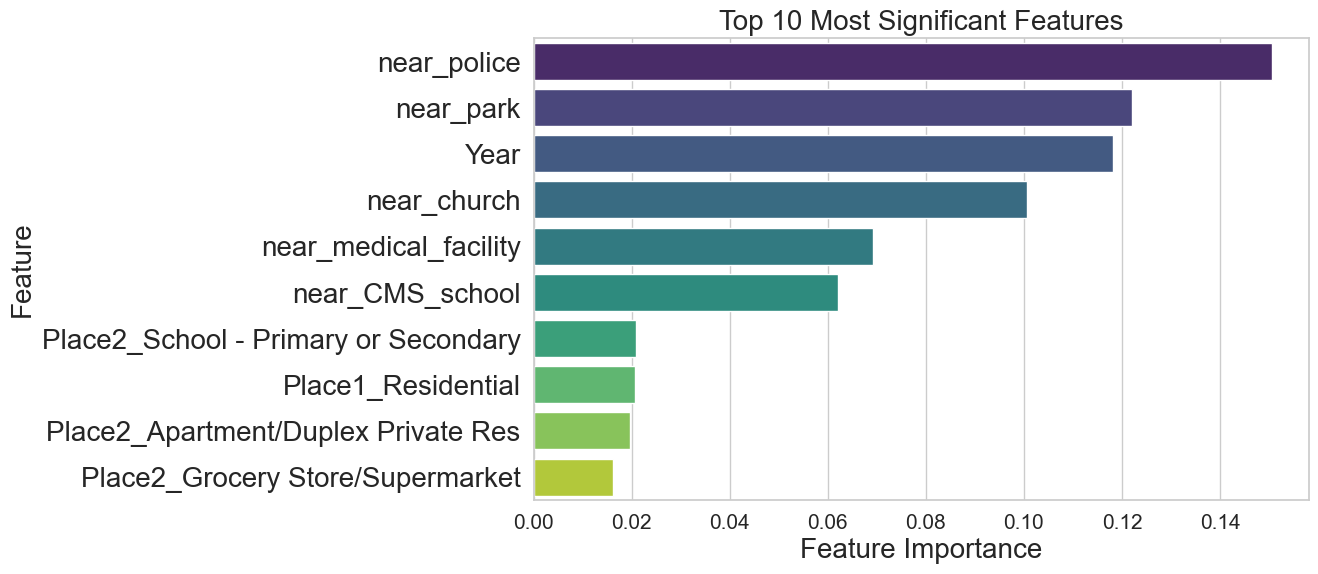

In [25]:
# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most significant features
top_features = 10
top_feature_importance = feature_importance_df.head(top_features)

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_feature_importance, palette="viridis")


plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.title(f'Top {top_features} Most Significant Features', fontsize=20)


plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

plt.show()

Confusion Matrix:
[[4909  583]
 [1708 1810]]


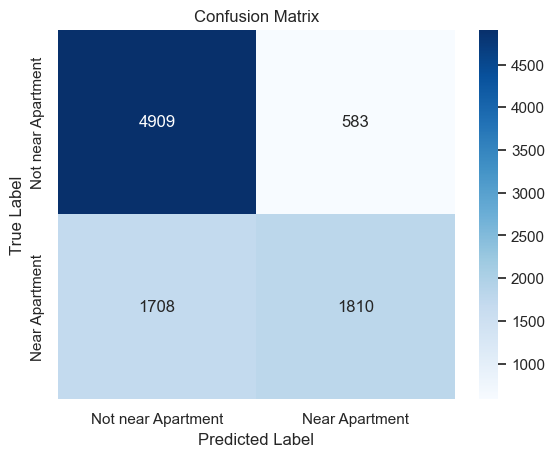

In [26]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_rf_pred_random)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not near Apartment', 'Near Apartment'], yticklabels=['Not near Apartment', 'Near Apartment'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

# Calculate metrics
precision = precision_score(y_test, y_rf_pred_random)
recall = recall_score(y_test, y_rf_pred_random)
f1 = f1_score(y_test, y_rf_pred_random)
accuracy = accuracy_score(y_test, y_rf_pred_random)

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.7563727538654409
Recall: 0.5144968732234224
F1 Score: 0.6124175266452377
Accuracy: 0.7457269700332964


# Random Forest Modeling continued

Since our RF model performed the best, we decided to expand upon that, and use different parameters and predictors and evaluate how the model performed.

In [28]:
X2 = df.drop(columns='near_police')
y2 = df['near_police']

# Converting categorical columns to dummy variables
X2 = pd.get_dummies(X2)

In [29]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=14)

In [30]:
rf02 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(X2,y2)
prediction_rf02 = rf02.predict(X2_test)

In [31]:
y2_pred = rf02.predict(X2_test)

In [32]:
rf02_accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy of the Random Forest Model: {rf02_accuracy}")

Accuracy of the Random Forest Model: 0.8588235294117647


In [33]:
accuracy = accuracy_score(y2_test, y2_pred)
precision_rf02 = precision_score(y2_test, y2_pred)
recall_rf02 = recall_score(y2_test, y2_pred)
f1_rf02 = f1_score(y2_test, y2_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8588235294117647
Precision: 0.7563727538654409
Recall: 0.5144968732234224
F1 Score: 0.6124175266452377


Confusion Matrix:
[[3827  627]
 [ 645 3911]]


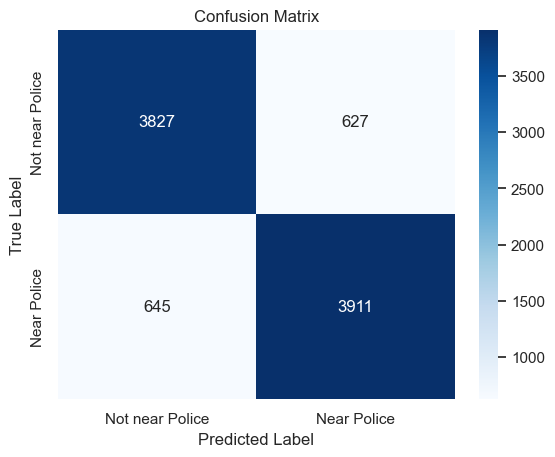

In [34]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y2_test, y2_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not near Police', 'Near Police'], yticklabels=['Not near Police', 'Near Police'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
X3 = df.drop(columns='near_medical_facility')
y3 = df['near_medical_facility']

# Converting categorical columns to dummy variables
X3 = pd.get_dummies(X3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=14)

rf03 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(X3,y3)
prediction_rf03 = rf03.predict(X3_test)

rf03_predict = rf03.predict(X3_test)

rf03_accuracy = accuracy_score(y3_test, rf03_predict)
print(f"Accuracy of the Random Forest Model: {rf03_accuracy}")

Accuracy of the Random Forest Model: 0.9331853496115428


Confusion Matrix:
[[7064  154]
 [ 448 1344]]


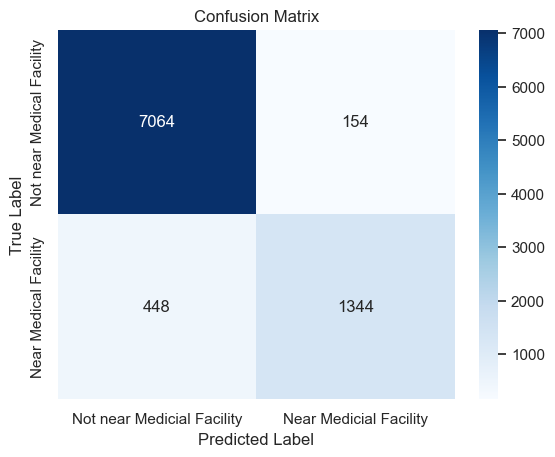

In [36]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y3_test, rf03_predict)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not near Medicial Facility', 'Near Medicial Facility'], yticklabels=['Not near Medical Facility', 'Near Medical Facility'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
y3_pred = rf03.predict(X3_test)

# Calculate confusion matrix
conf_matrix_rf03 = confusion_matrix(y3_test, y3_pred)

# Calculate metrics
accuracy_rf03 = accuracy_score(y3_test, y3_pred)
precision_rf03 = precision_score(y3_test, y3_pred)
recall_rf03 = recall_score(y3_test, y3_pred)
f1_rf03 = f1_score(y3_test, y3_pred)

# Print metrics
print("Accuracy:", accuracy_rf03)
print("Precision:", precision_rf03)
print("Recall:", recall_rf03)
print("F1 Score:", f1_rf03)

Accuracy: 0.9331853496115428
Precision: 0.897196261682243
Recall: 0.75
F1 Score: 0.8170212765957446


In [38]:
X4 = df.drop(columns='near_CMS_school')
y4 = df['near_CMS_school']

# Converting categorical columns to dummy variables
X4 = pd.get_dummies(X4)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=14)

rf04 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(X4,y4)
prediction_rf04 = rf04.predict(X4_test)

rf04_predict = rf04.predict(X4_test)

rf04_accuracy = accuracy_score(y4_test, rf04_predict)
print(f"Accuracy of the Random Forest Model: {rf04_accuracy}")

Accuracy of the Random Forest Model: 0.9260821309655938


In [39]:
y4_pred = rf04.predict(X4_test)

# Calculate confusion matrix
conf_matrix_rf04 = confusion_matrix(y4_test, y4_pred)

# Calculate metrics
accuracy_rf04 = accuracy_score(y4_test, y4_pred)
precision_rf04 = precision_score(y4_test, y4_pred)
recall_rf04 = recall_score(y4_test, y4_pred)
f1_rf04 = f1_score(y4_test, y4_pred)

# Print metrics
print("Accuracy:", accuracy_rf04)
print("Precision:", precision_rf04)
print("Recall:", recall_rf04)
print("F1 Score:", f1_rf04)

Accuracy: 0.9260821309655938
Precision: 0.8641304347826086
Recall: 0.6489795918367347
F1 Score: 0.7412587412587412


Confusion Matrix:
[[7390  150]
 [ 516  954]]


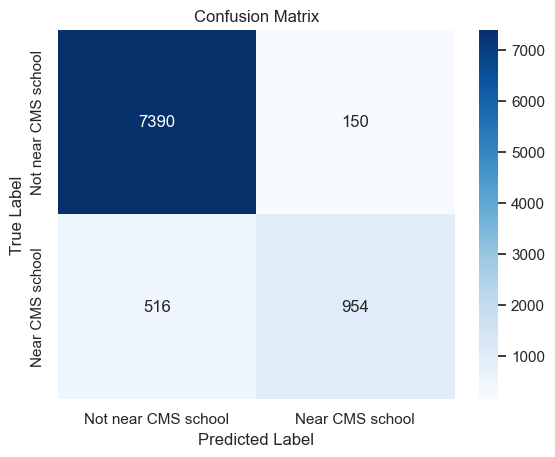

In [40]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y4_test, rf04_predict)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not near CMS school', 'Near CMS school'], yticklabels=['Not near CMS school', 'Near CMS school'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
X5 = df.drop(columns='near_park')
y5 = df['near_park']

# Converting categorical columns to dummy variables
X5 = pd.get_dummies(X5)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.25, random_state=14)

rf05 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(X5,y5)
prediction_rf05 = rf05.predict(X5_test)

rf05_predict = rf05.predict(X5_test)

rf05_accuracy = accuracy_score(y5_test, rf05_predict)
print(f"Accuracy of the Random Forest Model: {rf05_accuracy}")


Accuracy of the Random Forest Model: 0.8423973362930077


In [42]:
y5_pred = rf05.predict(X5_test)

# Calculate confusion matrix
conf_matrix_rf05 = confusion_matrix(y5_test, y5_pred)

# Calculate metrics
accuracy_rf05 = accuracy_score(y5_test, y5_pred)
precision_rf05 = precision_score(y5_test, y5_pred)
recall_rf05 = recall_score(y5_test, y5_pred)
f1_rf05 = f1_score(y5_test, y5_pred)

# Print metrics
print("Accuracy:", accuracy_rf05)
print("Precision:", precision_rf05)
print("Recall:", recall_rf05)
print("F1 Score:", f1_rf05)


Accuracy: 0.8423973362930077
Precision: 0.8131313131313131
Recall: 0.8668071161048689
F1 Score: 0.8391117153863584


Confusion Matrix:
[[3887  851]
 [ 569 3703]]


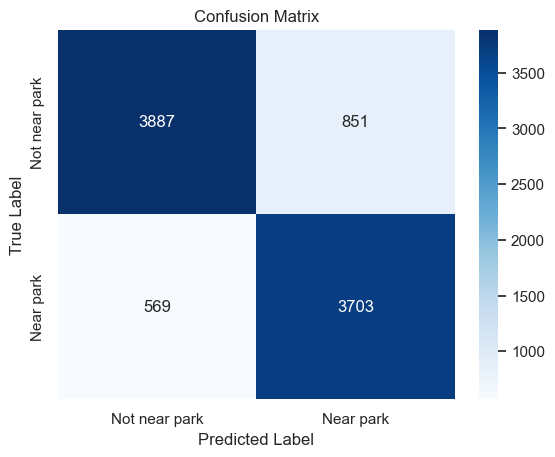

In [43]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y5_test, rf05_predict)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not near park', 'Near park'], yticklabels=['Not near park', 'Near park'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
X6 = df.drop(columns='near_church')
y6 = df['near_church']

# Converting categorical columns to dummy variables
X6 = pd.get_dummies(X6)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.25, random_state=15)

rf06 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(X6,y6)
prediction_rf06 = rf06.predict(X6_test)

rf06_predict = rf06.predict(X6_test)

rf06_accuracy = accuracy_score(y6_test, rf06_predict)
print(f"Accuracy of the Random Forest Model: {rf06_accuracy}")


Accuracy of the Random Forest Model: 0.8438401775804661


In [45]:
y6_pred = rf06.predict(X6_test)

# Calculate confusion matrix
conf_matrix_rf06 = confusion_matrix(y6_test, y6_pred)

# Calculate metrics
accuracy_rf06 = accuracy_score(y6_test, y6_pred)
precision_rf06 = precision_score(y6_test, y6_pred)
recall_rf06 = recall_score(y6_test, y6_pred)
f1_rf06 = f1_score(y6_test, y6_pred)

# Print metrics
print("Accuracy:", accuracy_rf06)
print("Precision:", precision_rf06)
print("Recall:", recall_rf06)
print("F1 Score:", f1_rf06)

Accuracy: 0.8438401775804661
Precision: 0.8568029418126758
Recall: 0.8416914577135571
F1 Score: 0.8491799764176226


In [46]:
conf_matrix = confusion_matrix(y6_test, rf06_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3642  662]
 [ 745 3961]]


Confusion Matrix:
[[3642  662]
 [ 745 3961]]


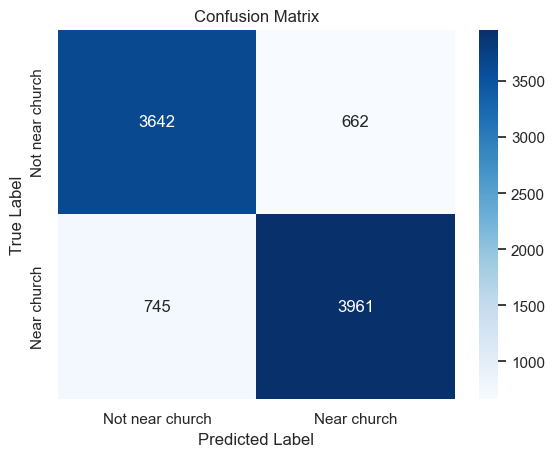

In [47]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y6_test, rf06_predict)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not near church', 'Near church'], yticklabels=['Not near church', 'Near church'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

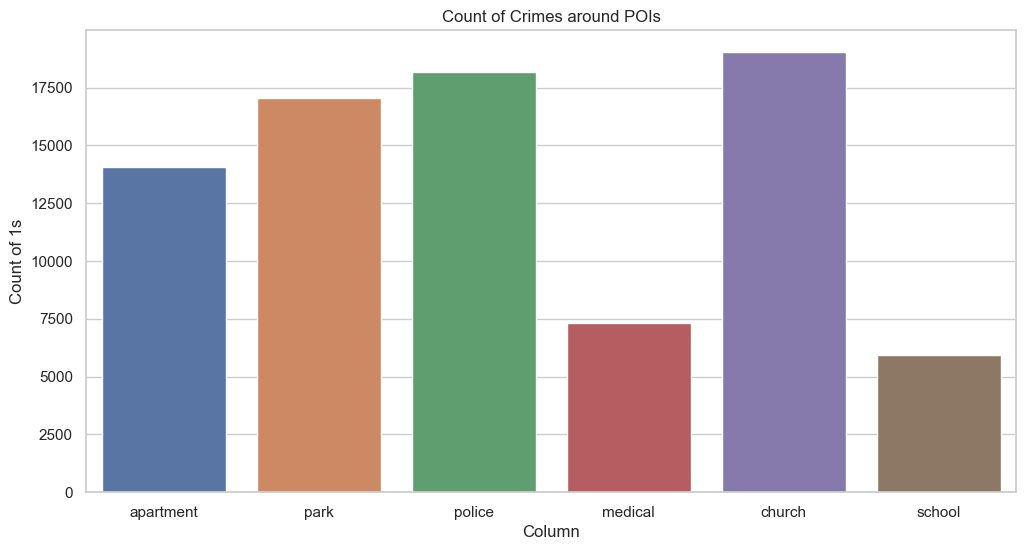

In [48]:

binary_columns = ['near_apartment', 'near_park', 'near_police','near_medical_facility','near_church','near_CMS_school']

count_of_ones = df[binary_columns].sum()


counts_df = pd.DataFrame({'Column': count_of_ones.index, 'Count of 1s': count_of_ones.values})

# Plot a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='Count of 1s', data=counts_df)
plt.title('Count of Crimes around POIs')
plt.xticks(np.arange(6), ['apartment', 'park', 'police', 'medical', 'church', 'school'])
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.show()


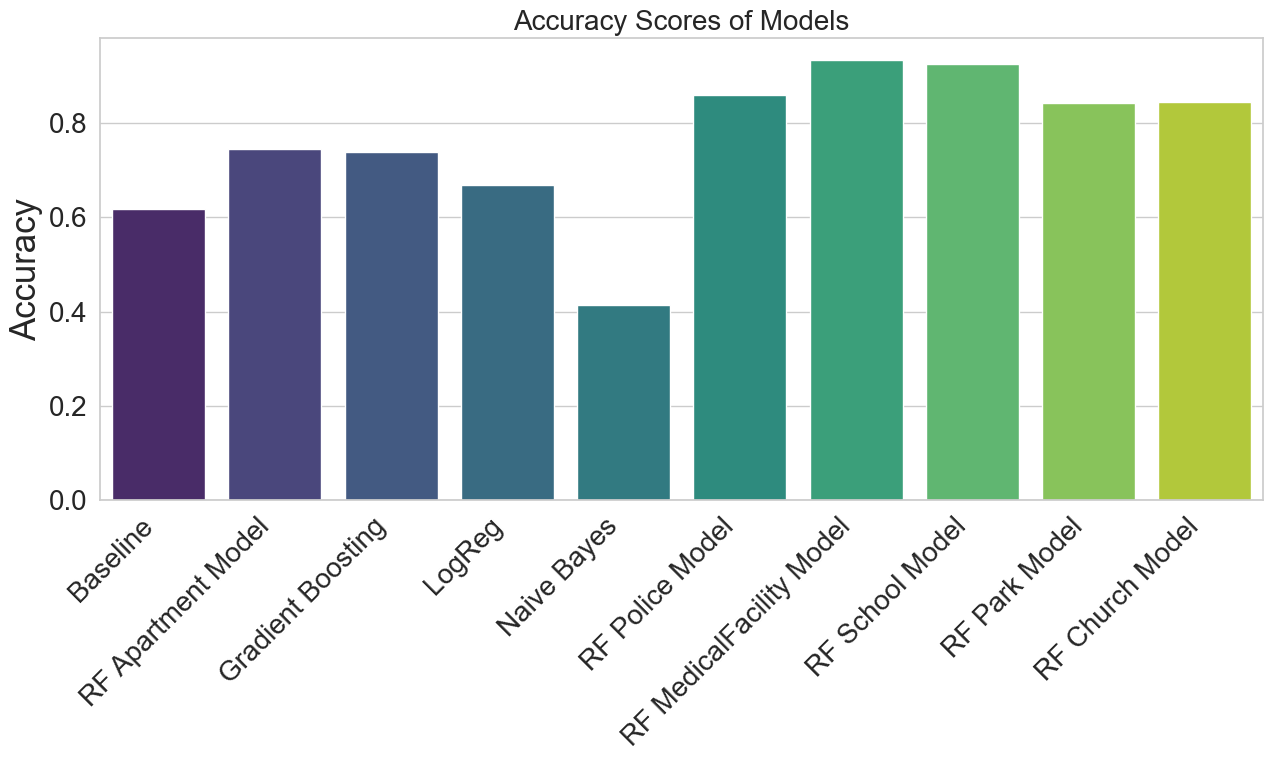

In [49]:
accuracy_scores = [final_accuracy, rf_accuracy, gb_accuracy, logreg_accuracy, nb_accuracy, rf02_accuracy, rf03_accuracy, rf04_accuracy, rf05_accuracy, rf06_accuracy]

model_names = ['Baseline', 'RF Apartment Model', 'Gradient Boosting', 'LogReg', 'Naive Bayes', 'RF Police Model', ' RF MedicalFacility Model', 'RF School Model', 'RF Park Model', 'RF Church Model']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=model_names, y=accuracy_scores, palette="viridis")
plt.title("Accuracy Scores of Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=25)


barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=30)
barplot.tick_params(axis='both', which='major', labelsize=20)
plt.show()

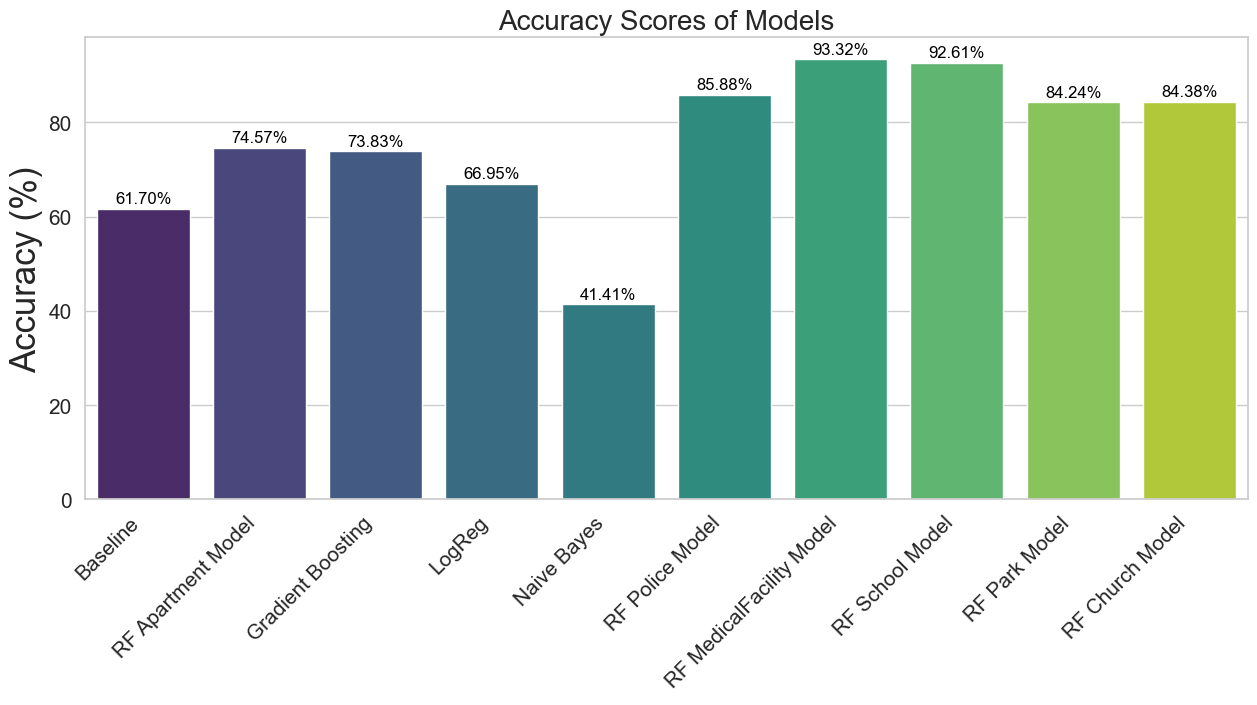

In [50]:
accuracy_scores = [final_accuracy, rf_accuracy, gb_accuracy, logreg_accuracy, nb_accuracy, rf02_accuracy, rf03_accuracy, rf04_accuracy, rf05_accuracy, rf06_accuracy]

# Convert accuracy scores to percentages
accuracy_percentages = [acc * 100 for acc in accuracy_scores]

model_names = ['Baseline', 'RF Apartment Model', 'Gradient Boosting', 'LogReg', 'Naive Bayes', 'RF Police Model', ' RF MedicalFacility Model', 'RF School Model', 'RF Park Model', 'RF Church Model']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=model_names, y=accuracy_percentages, palette="viridis")
plt.title("Accuracy Scores of Models", fontsize=20)
plt.ylabel("Accuracy (%)", fontsize=25)

# Add actual accuracy values on top of the bars
for i, v in enumerate(accuracy_percentages):
    barplot.text(i, v + 0.5, f'{v:.2f}%', color='black', ha='center', va='bottom', fontsize=12)

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
barplot.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [51]:
accuracy_scores = {
    'Baseline Model': final_accuracy,
    'RF Apartment Accuracy': rf_accuracy,
    'Gradient Boosting Model': gb_accuracy,
    'Logistic Regression Model': logreg_accuracy,
    'Naive Bayes Model': nb_accuracy,
    'RF Police': rf02_accuracy,
    'RF Medical Facility ': rf03_accuracy,
    'RF School': rf04_accuracy,
    'RF Park': rf05_accuracy,
    'RF Church': rf06_accuracy
}

for model, accuracy in accuracy_scores.items():
    print(f"Accuracy of {model}: {accuracy}")

Accuracy of Baseline Model: 0.6169811320754717
Accuracy of RF Apartment Accuracy: 0.7457269700332964
Accuracy of Gradient Boosting Model: 0.7382907880133185
Accuracy of Logistic Regression Model: 0.6694783573806882
Accuracy of Naive Bayes Model: 0.41409544950055494
Accuracy of RF Police: 0.8588235294117647
Accuracy of RF Medical Facility : 0.9331853496115428
Accuracy of RF School: 0.9260821309655938
Accuracy of RF Park: 0.8423973362930077
Accuracy of RF Church: 0.8438401775804661


In [52]:
crime_counts_by_location = df.groupby('NIBRS_Hi_Class').sum()
print(crime_counts_by_location)

                                      near_medical_facility  near_CMS_school  \
NIBRS_Hi_Class                                                                 
Affray                                                   19               79   
Aggravated Assault                                      178              176   
All Other Offenses                                      311              312   
All Other Thefts                                        799              613   
Arson                                                     7               18   
...                                                     ...              ...   
Trespass Of Real Property                                83               53   
Vehicle Recovery                                         25               21   
Weapon Law Violations                                    29               95   
Wire Fraud                                               13                8   
Worthless Check: Felony (over $2000)    

C:\Users\Spencer\AppData\Local\Temp\ipykernel_5032\1729413895.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_counts_by_location = df.groupby('NIBRS_Hi_Class').sum()


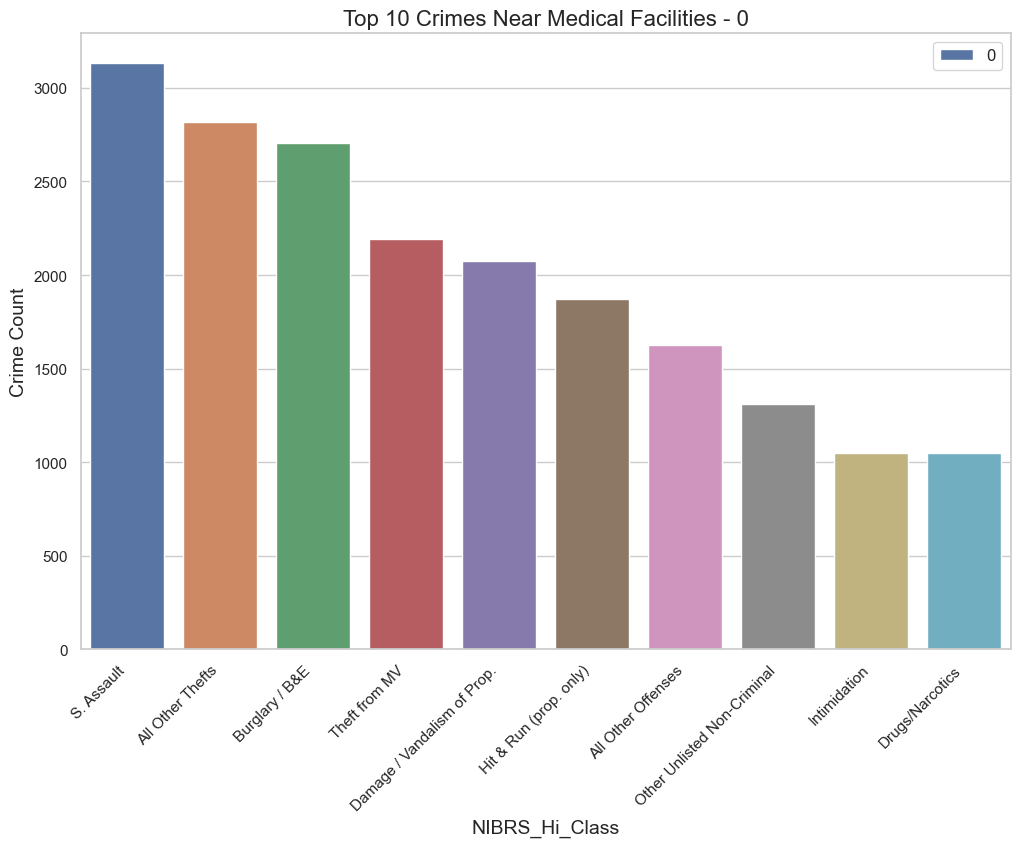

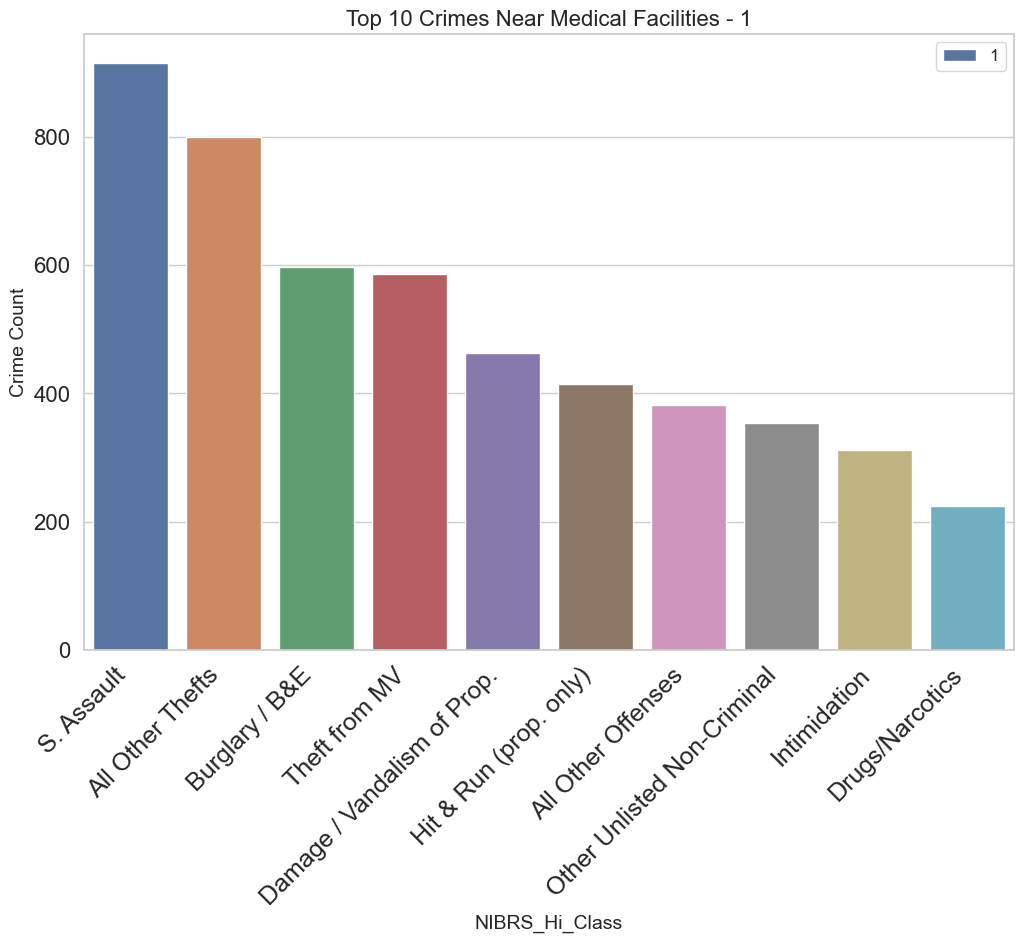

In [53]:
top_crimes_by_location = (
    df.groupby(['near_medical_facility', 'NIBRS_Hi_Class'])
    .size()
    .reset_index(name='Count')
    .groupby('near_medical_facility')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a Seaborn bar plot for each location
for location in top_crimes_by_location['near_medical_facility'].unique():
    location_data = top_crimes_by_location[top_crimes_by_location['near_medical_facility'] == location]
    plt.figure(figsize=(12, 8))
    sns.barplot(data=location_data, x='NIBRS_Hi_Class', y='Count', label=location)
    plt.xlabel('NIBRS_Hi_Class', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.title(f'Top 10 Crimes Near Medical Facilities - {location}', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xticks(np.arange(10), ['S. Assault', 'All Other Thefts', 'Burglary / B&E', 'Theft from MV', 'Damage / Vandalism of Prop.', 'Hit & Run (prop. only)', 'All Other Offenses', 'Other Unlisted Non-Criminal', 'Intimidation', 'Drugs/Narcotics'])
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=16)
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 20
    plt.show()

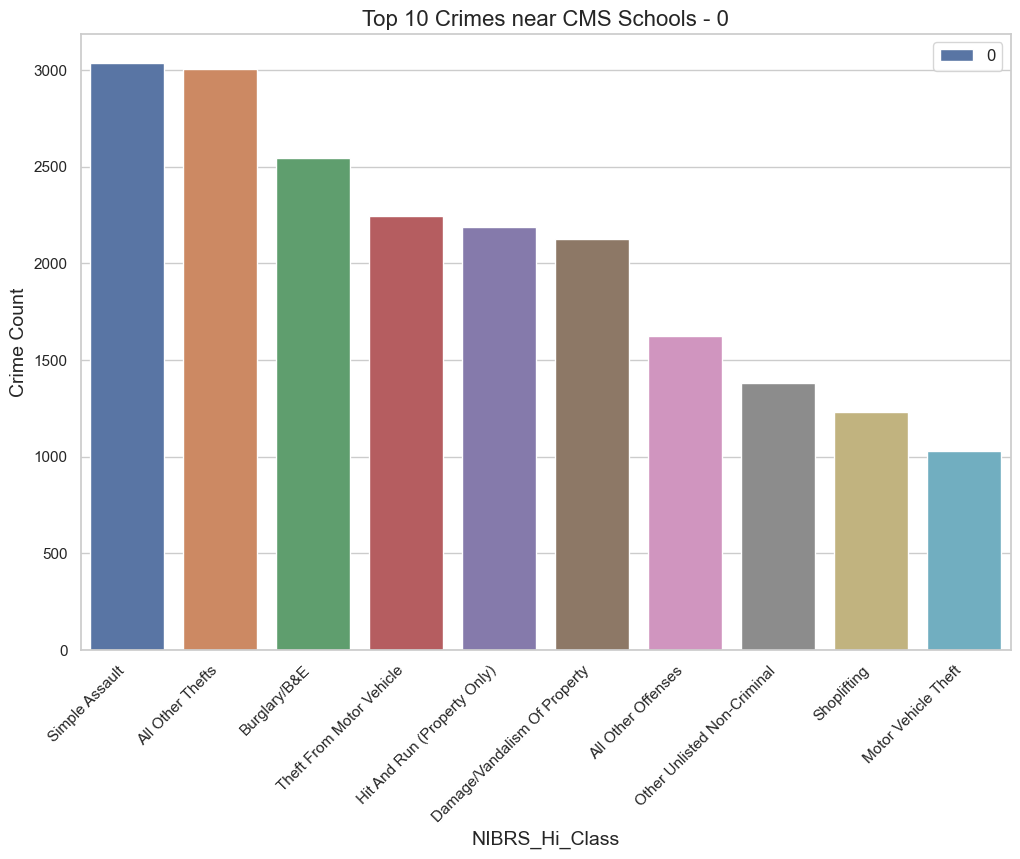

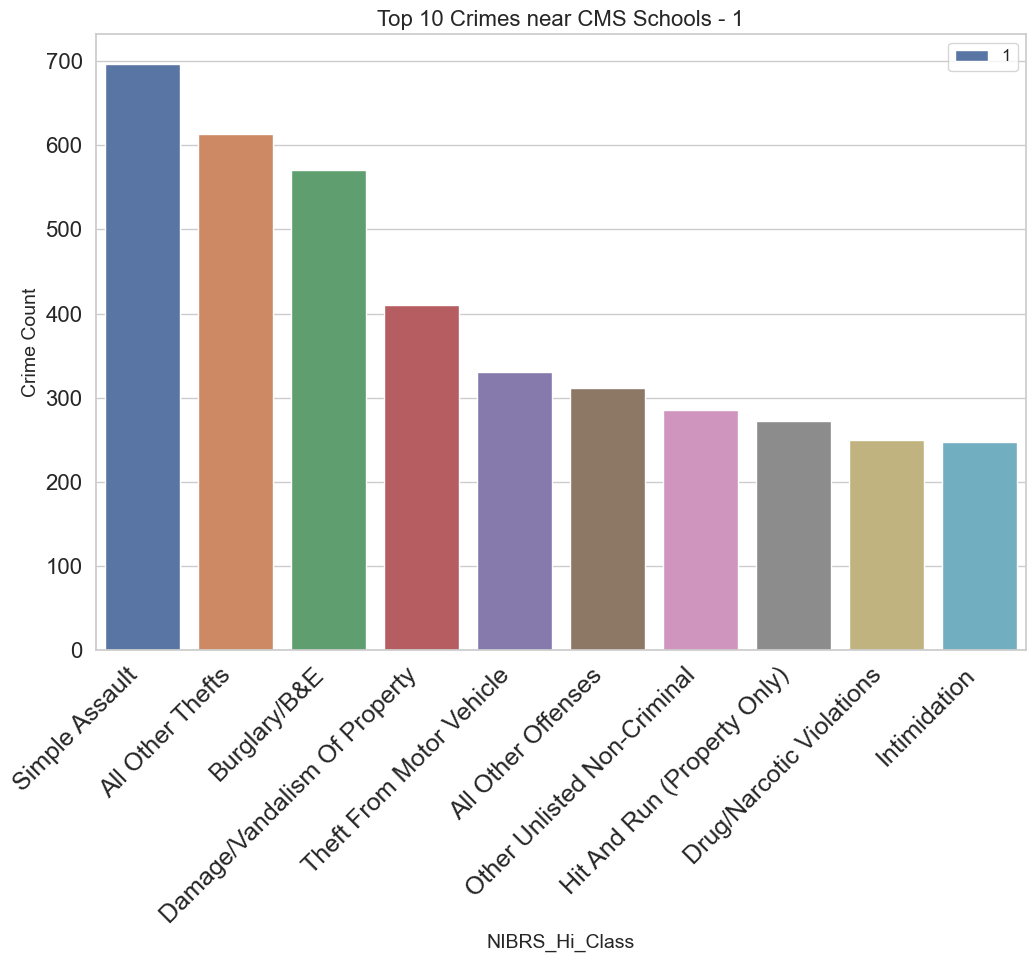

In [54]:
top_crimes_by_location = (
    df.groupby(['near_CMS_school', 'NIBRS_Hi_Class'])
    .size()
    .reset_index(name='Count')
    .groupby('near_CMS_school')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a Seaborn bar plot for each location
for location in top_crimes_by_location['near_CMS_school'].unique():
    location_data = top_crimes_by_location[top_crimes_by_location['near_CMS_school'] == location]
    plt.figure(figsize=(12, 8))
    sns.barplot(data=location_data, x='NIBRS_Hi_Class', y='Count', label=location)
    plt.xlabel('NIBRS_Hi_Class', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.title(f'Top 10 Crimes near CMS Schools - {location}', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=16)
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 20
    plt.show()

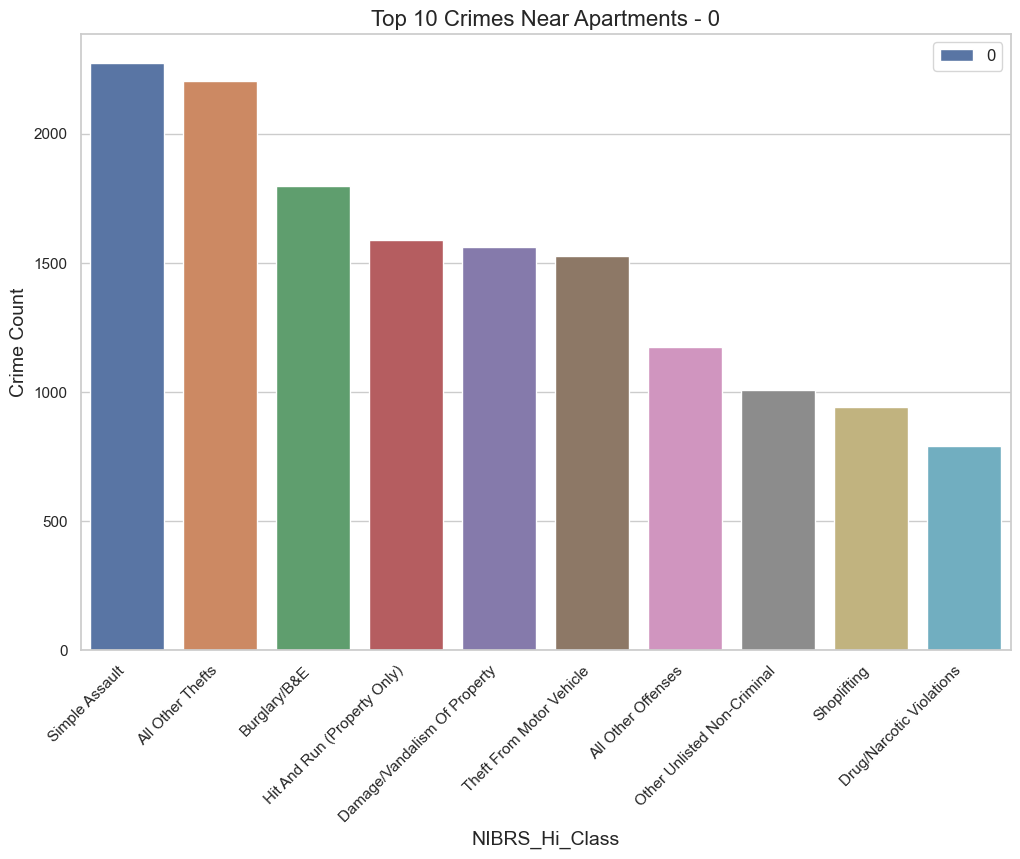

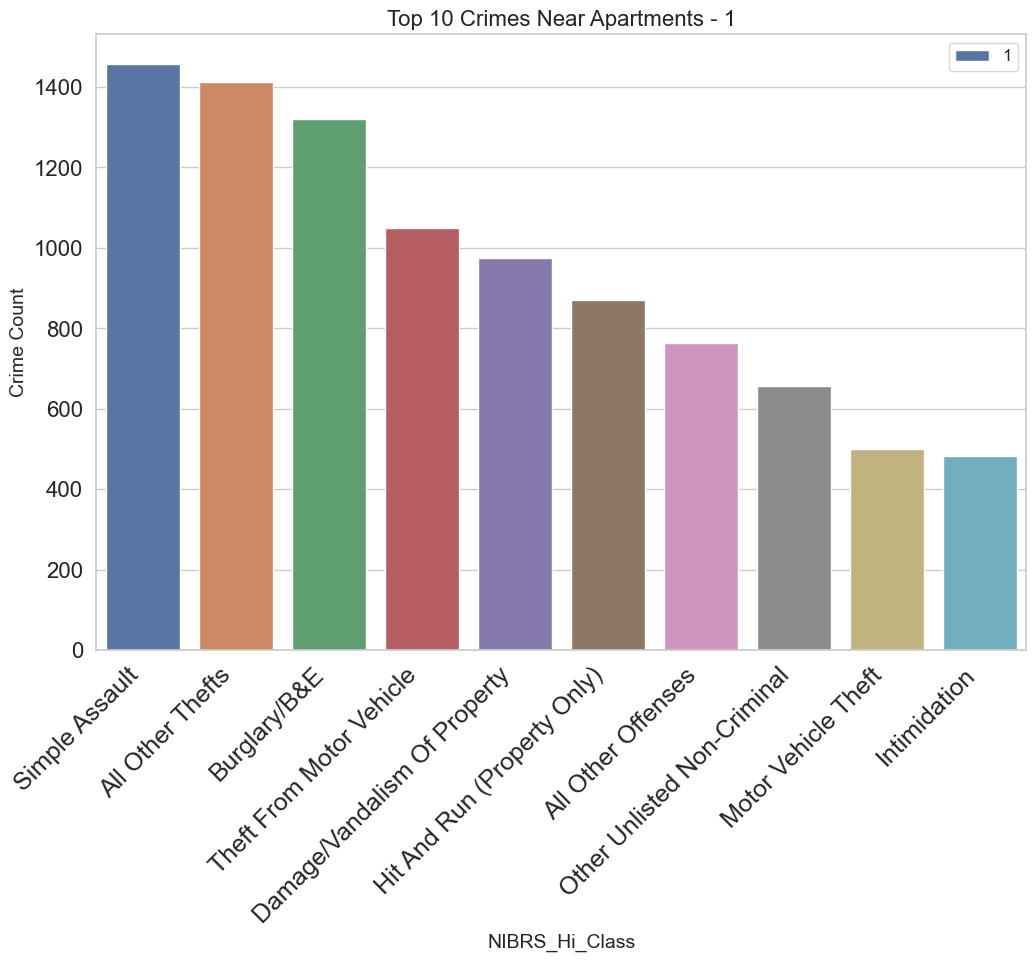

In [55]:
top_crimes_by_location = (
    df.groupby(['near_apartment', 'NIBRS_Hi_Class'])
    .size()
    .reset_index(name='Count')
    .groupby('near_apartment')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a Seaborn bar plot for each location
for location in top_crimes_by_location['near_apartment'].unique():
    location_data = top_crimes_by_location[top_crimes_by_location['near_apartment'] == location]
    plt.figure(figsize=(12, 8))
    sns.barplot(data=location_data, x='NIBRS_Hi_Class', y='Count', label=location)
    plt.xlabel('NIBRS_Hi_Class', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.title(f'Top 10 Crimes Near Apartments - {location}', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=16)
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 20
    plt.show()

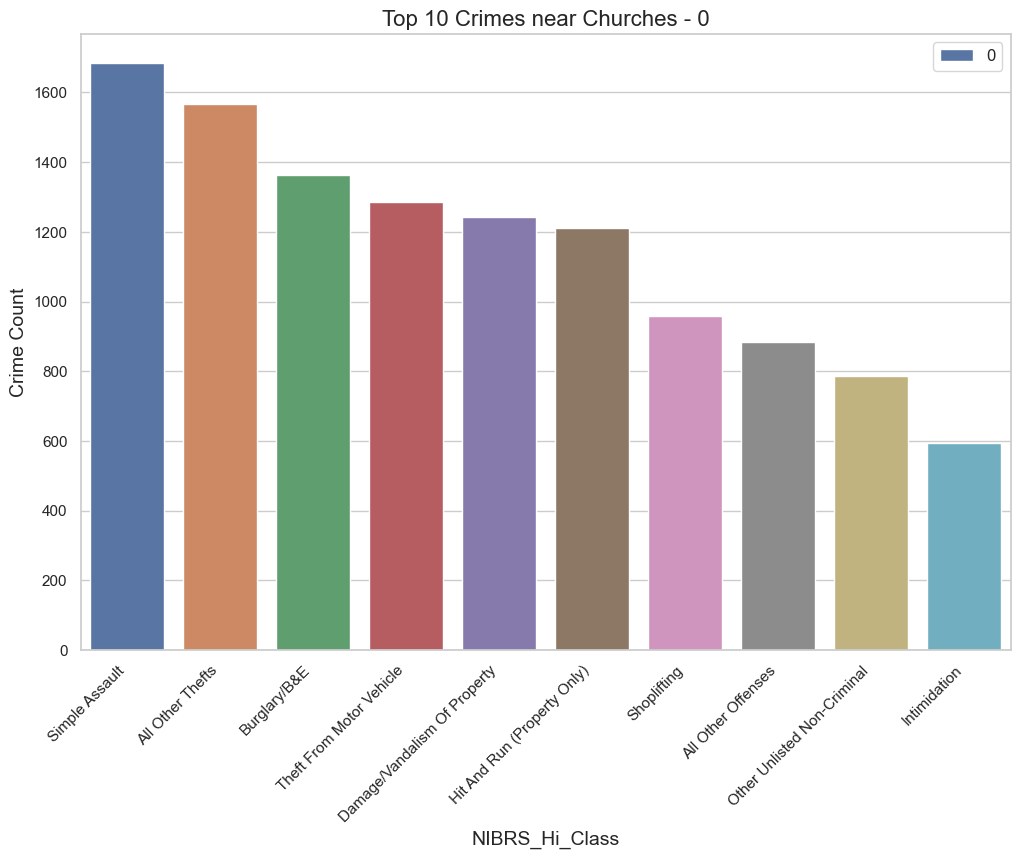

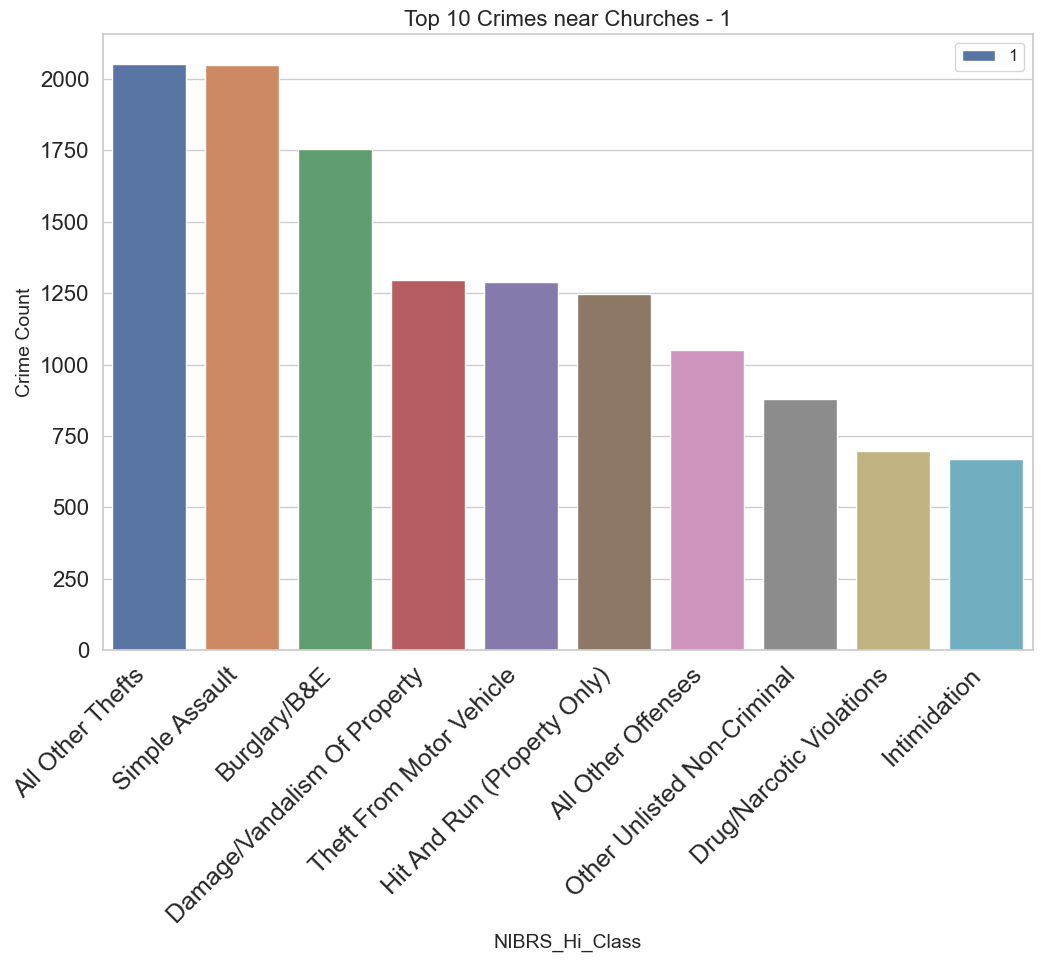

In [56]:
top_crimes_by_location = (
    df.groupby(['near_church', 'NIBRS_Hi_Class'])
    .size()
    .reset_index(name='Count')
    .groupby('near_church')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a Seaborn bar plot for each location
for location in top_crimes_by_location['near_church'].unique():
    location_data = top_crimes_by_location[top_crimes_by_location['near_church'] == location]
    plt.figure(figsize=(12, 8))
    sns.barplot(data=location_data, x='NIBRS_Hi_Class', y='Count', label=location)
    plt.xlabel('NIBRS_Hi_Class', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.title(f'Top 10 Crimes near Churches - {location}', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=16)
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 20
    plt.show()

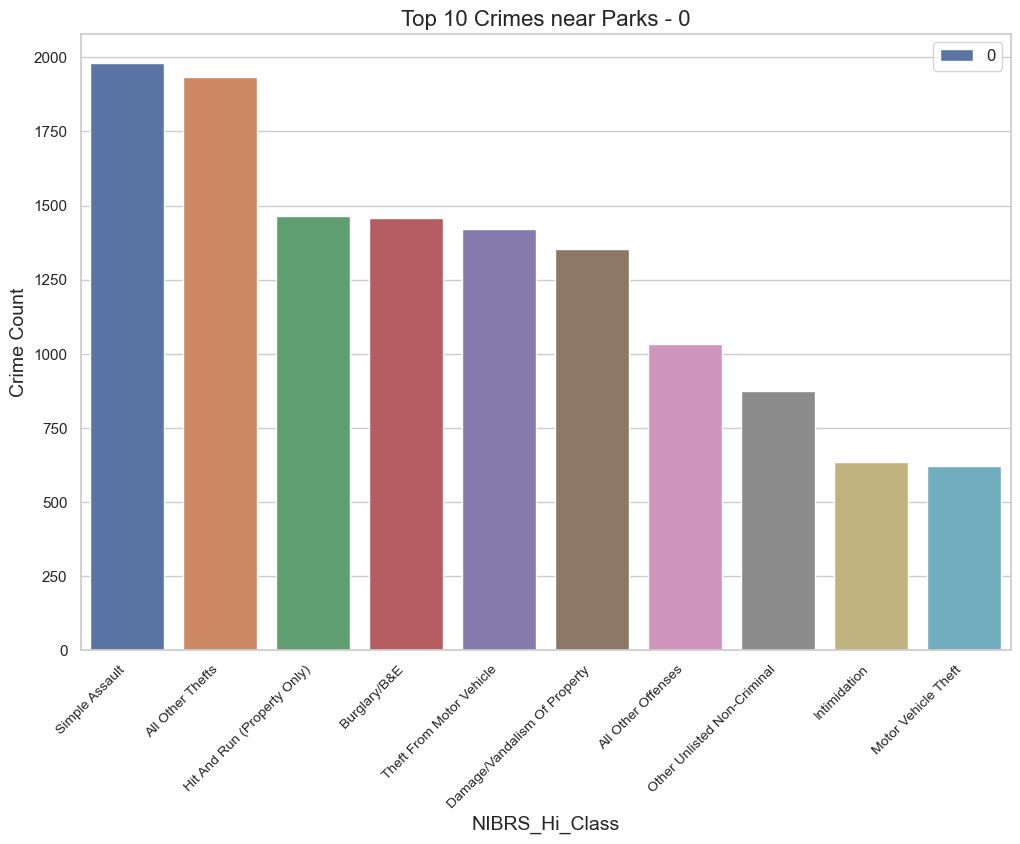

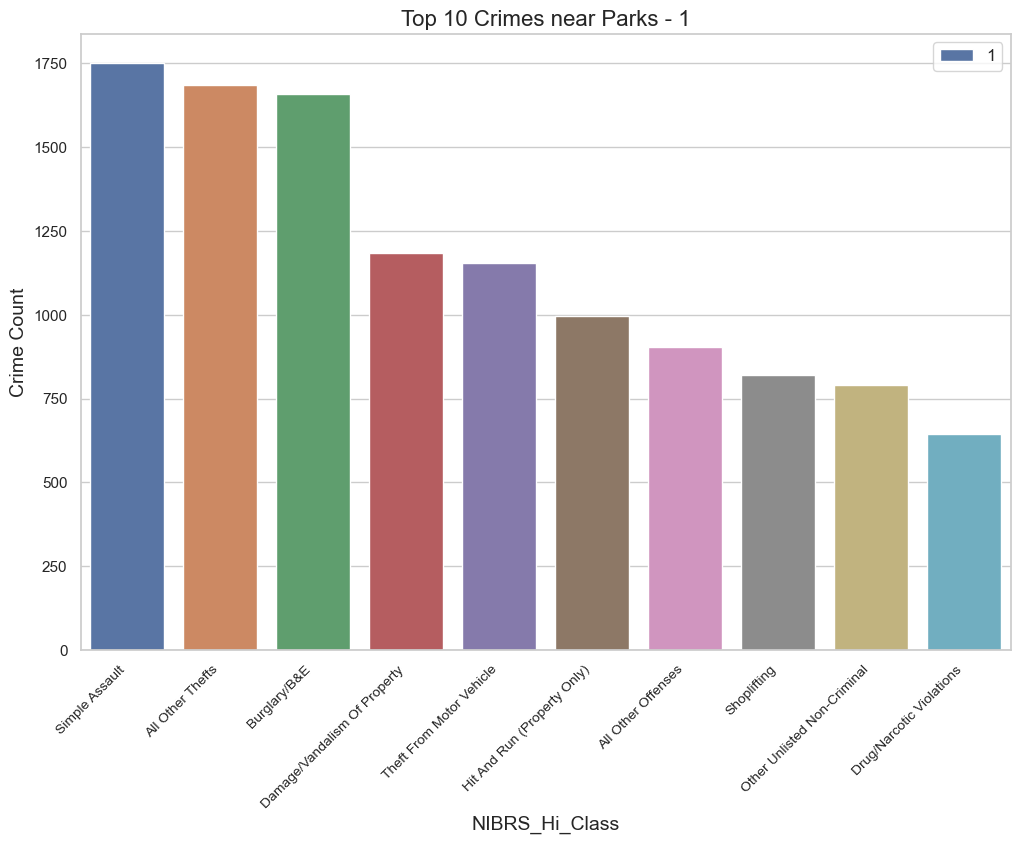

In [57]:
top_crimes_by_location = (
    df.groupby(['near_park', 'NIBRS_Hi_Class'])
    .size()
    .reset_index(name='Count')
    .groupby('near_park')
    .apply(lambda x: x.nlargest(10, 'Count'))
    .reset_index(drop=True)
)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a Seaborn bar plot for each location
for location in top_crimes_by_location['near_park'].unique():
    location_data = top_crimes_by_location[top_crimes_by_location['near_park'] == location]
    plt.figure(figsize=(12, 8))
    sns.barplot(data=location_data, x='NIBRS_Hi_Class', y='Count', label=location)
    plt.xlabel('NIBRS_Hi_Class', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.title(f'Top 10 Crimes near Parks - {location}', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

In [58]:
models = ['Apartment Model', 'Police Model', 'Medical Facility Model', 'School Model', 'Park Model', 'Church Model']
precision_values = [precision, precision_rf02, precision_rf03, precision_rf04, precision_rf05, precision_rf06]
recall_values = [recall, recall_rf02, recall_rf03, recall_rf04, recall_rf05, recall_rf06]
f1_values = [f1, f1_rf02, f1_rf03, f1_rf04, f1_rf05, f1_rf06]

# Convert precision, recall, and F1 score values to percentages
precision_percentages = [prec * 100 for prec in precision_values]
recall_percentages = [rec * 100 for rec in recall_values]
f1_percentages = [f1_val * 100 for f1_val in f1_values]

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Model': models,
    'Precision (%)': precision_percentages,
    'Recall (%)': recall_percentages,
    'F1 Score (%)': f1_percentages
})

# Display the table
print(metrics_df)

                    Model  Precision (%)  Recall (%)  F1 Score (%)
0         Apartment Model      75.637275   51.449687     61.241753
1            Police Model      86.183341   85.842845     86.012756
2  Medical Facility Model      89.719626   75.000000     81.702128
3            School Model      86.413043   64.897959     74.125874
4              Park Model      81.313131   86.680712     83.911172
5            Church Model      85.680294   84.169146     84.917998


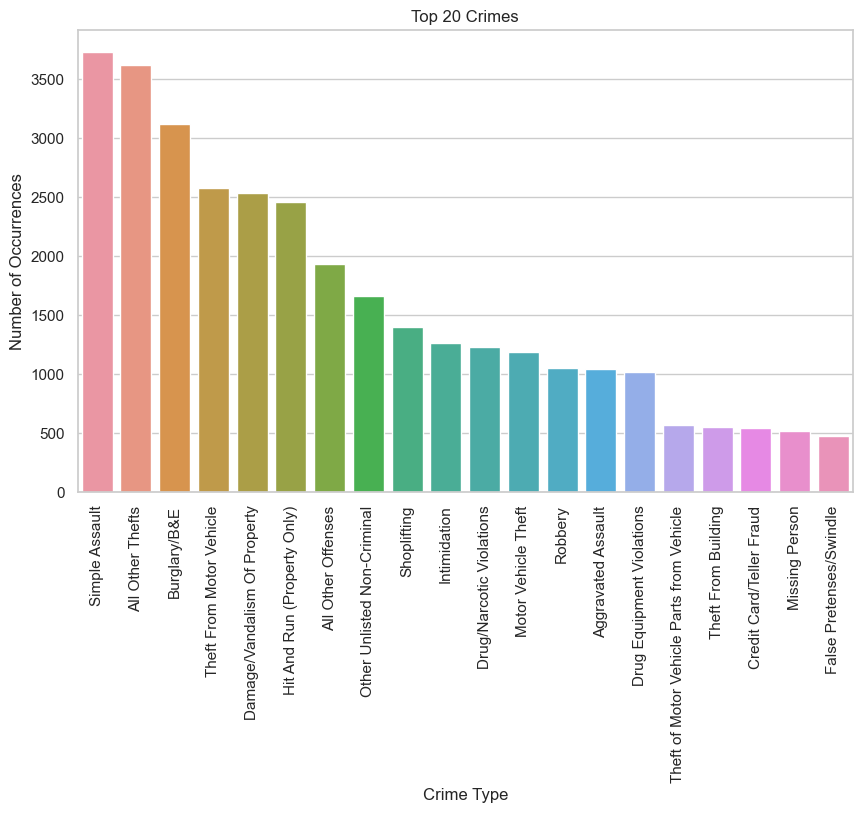

In [59]:
# Step 1: Extract Data
crime_data = df['NIBRS_Hi_Class']  # Assuming 'nibrs_hi_class' is a column in your DataFrame

# Step 2: Count Crimes
crime_counts = crime_data.value_counts()

# Step 3: Sort Crimes
sorted_crimes = crime_counts.sort_values(ascending=False)

# Step 4: Select Top 20
top_20_crimes = sorted_crimes.head(20)

Create Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_crimes.index, y=top_20_crimes.values)
plt.xticks(rotation=90)
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Crimes')
plt.show()